In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
#read train and test files
train_file = pd.read_csv('Data/mnist/train.csv')
test_file = pd.read_csv('Data/mnist/test.csv')
#(x_raw, y_raw), (x_raw_test, y_raw_test), min_, max_ = load_mnist(raw=True)

In [4]:
#view first 5 records of train_file
train_file.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_file.ix[0].values.shape

(785,)

In [6]:
#view first 5 records of test_file
test_file.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#list of all digits that are going to be predicted
np.sort(train_file.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
#define the number of samples for training set and for validation set
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)

In [9]:
num_train,num_validation

(33600, 8400)

In [10]:
#generate training data from train_file
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [11]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [13]:
y_train[0:10]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

# Visualize Training Data

Label: 4


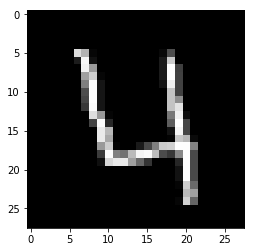

In [14]:
index=3
print("Label: " + str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
plt.show()

In [15]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)

In [17]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.9380952380952381


In [18]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

Validation Confusion Matrix: 
[[833   0   4   1   0   2   7   0   5   0]
 [  0 937   4   1   1   0   2   0   3   2]
 [ 12   2 756  11   5   3   3   2   6   1]
 [  4   7  24 811   0  16   2   7   9   2]
 [  7   4   2   1 758   0   8   2   4  25]
 [  5   2   2  31   4 679   7   0  11   6]
 [  9   4   3   0  10   7 794   0   4   0]
 [  1   5  10   3   8   2   0 845   2   8]
 [  5  16   9  16   8  12   6   3 721   6]
 [  7   4   4  10  35   3   1  21   9 746]]


In [19]:
x_test_adv = pd.read_csv('Data/mnist/x_test_adv.csv',index_col=0)
y_test_adv = pd.read_csv('Data/mnist/y_test_adv.csv',index_col=0)
x_test_adv = x_test_adv.as_matrix()
y_test_adv = y_test_adv.as_matrix()
prediction_validation = clf.predict(x_test_adv)
print("Validation Accuracy: " + str(accuracy_score(y_test_adv,prediction_validation)))

Validation Accuracy: 0.22


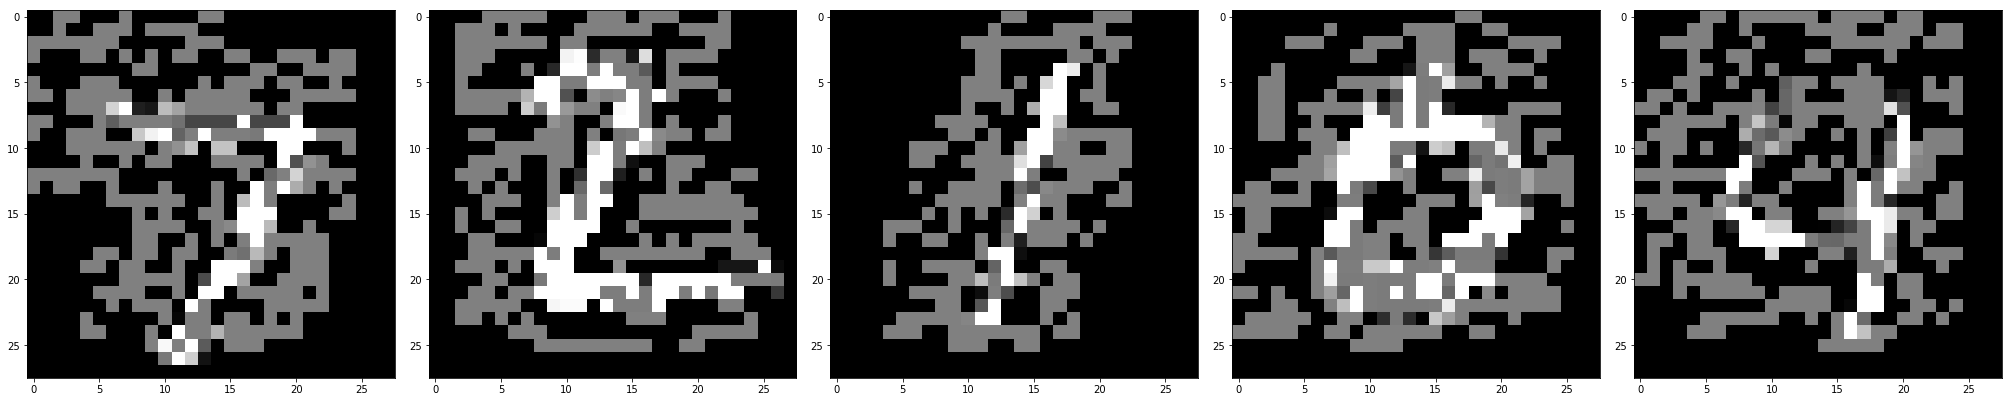

In [40]:
n = 5
for i in range(n):
    plt.figure(1, figsize=(28,28))
    plt.tight_layout()
    plt.subplot(1, n, i+1)        
    plt.imshow(x_test_adv[i].reshape((28,28)),cmap='gray')

In [20]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_test_adv,prediction_validation)))

Validation Confusion Matrix: 
[[ 2  0  0  0  0  0  0  6  0  0]
 [ 0  4  0  0  0  0  0 10  0  0]
 [ 0  3  0  1  0  3  0  1  0  0]
 [ 0  2  0  2  0  1  0  6  0  0]
 [ 0  2  0  1  0  4  0  7  0  0]
 [ 0  2  0  0  0  0  0  5  0  0]
 [ 0  1  0  0  0  1  0  8  0  0]
 [ 0  0  0  0  0  1  0 14  0  0]
 [ 0  1  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  1  1  0  8  0  0]]


# View wrong predictions

In [21]:
prediction_validation[1]

1

Predicted [2] as 1


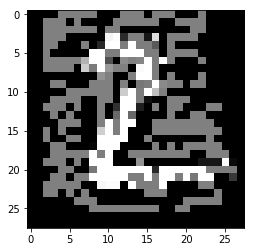

In [22]:
index=1
print("Predicted " + str(y_test_adv[index]) + " as " + 
     str(prediction_validation[index]))
plt.imshow(x_test_adv[index].reshape((28,28)),cmap='gray')

In [23]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)
predictions = model.predict(x_validation)

In [27]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,predictions)))

Validation Accuracy: 0.969047619047619


In [29]:
prediction_validation = model.predict(x_test_adv)
print("Validation Accuracy: " + str(accuracy_score(y_test_adv,prediction_validation)))

Validation Accuracy: 0.14


In [30]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_test_adv,prediction_validation)))

Validation Confusion Matrix: 
[[ 0  8  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]]
